# hiSixTrack Analyze the losses in the DS clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read the losses

In [2]:
aperl = pd.read_csv('../../runs_0TCLD.0-10um/fort.999',delim_whitespace=True)
aperl.columns = ['S','E','A','Z']

aperl['chi'] = (aperl['Z']/82.)*(208./aperl['A'])

In [4]:
aperl[1:10]

,S,E,A,Z,chi
1,18.8,5183.9,2,1,1.268293
2,18.8,73448.2,28,14,1.268293
3,18.8,10609.0,4,2,1.268293
4,18.8,10338.0,4,2,1.268293
5,19.0,10341.5,4,2,1.268293
6,19.6,10612.3,4,2,1.268293
7,20.4,5552.5,2,1,1.268293
8,112.3,9118.0,3,2,1.691057
9,120.2,4688.7,2,1,1.268293


In [5]:
# extract data for the DS clusters

In [6]:
xmin,xmax = 20282.,20350.
DS1 = aperl[(aperl.S>xmin) & (aperl.S<xmax)]
xmin,xmax = 20374.,20445.
DS2 = aperl[(aperl.S>xmin) & (aperl.S<xmax)]

## Plot the losses

In [19]:
%matplotlib inline

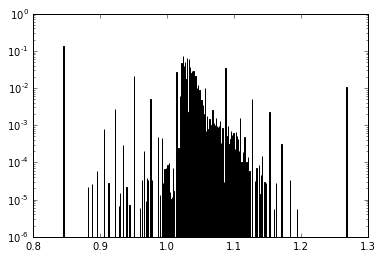

In [23]:
hist, bins = np.histogram(DS1.chi,weights=DS1.A, bins=1000)
width = 0.7 * (bins[1] - bins[0])

hist = hist.astype('float')

center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist/sum(hist), align='center', width=width)
plt.xlim(0.8,1.3)
plt.yscale('log')
plt.show()

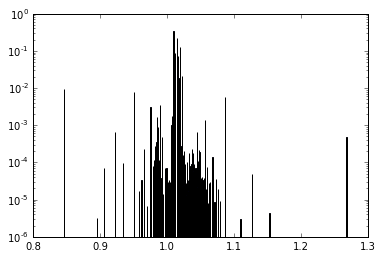

In [22]:
hist, bins = np.histogram(DS2.chi,weights=DS2.A, bins=1000)
width = 0.7 * (bins[1] - bins[0])

hist = hist.astype('float')

center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist/sum(hist), align='center', width=width)
plt.xlim(0.8,1.3)

plt.yscale('log')
plt.show()